# Machine Learning Classification Model for Twitter Tweets to Identify Hate Speech

Built as a part of Out In Tech Mentorship Program, by Andriy Kashyrskyy, with the help of mentor Sean Yun.

The dataset below includes Twitter tweets retrieved from two datasets posted on Kaggle and Github:

- **Dataset 1 link**: Kaggle https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech.
- **Dataset 2 link**: GitHub https://github.com/cs4good/social-good-106-section/tree/master/sentiment-analysis.



We merge two datasets by initially converting one of them from a JSON file to CSV file. The other dataset was originally in a CSV format. We want to merge the two datasets to diversity the training data and make our model initially more exposed to similar data with tweets from different resources.

# Data Preprocessing 

## Data Preprocessing: Dataset #1

### Let's take a look at the training dataset, by looking at its first 5 entries, and the information on types of data it includes.

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('train.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [120]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


**There are 31962 entries (tweets) in the Kaggle Dataset!**

#### Note: label '1' denotes that the tweet contains hate speech, and label '0' denotes that the tweet does not contain hate speech. Let's look at the amount of hate and non-hate speech observations in the dataset.

In [121]:
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

#### As we can see, there are 29,720 non-hate speech tweets, and 2, 242 hate speech tweets.

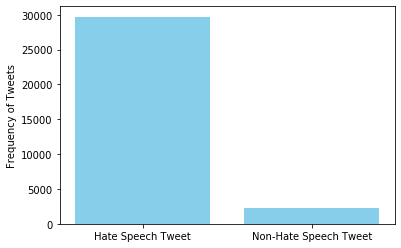

In [122]:
Sentiment_count = df.groupby('label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['tweet'], color="skyblue")
plt.xticks([0,1], ["Hate Speech Tweet", "Non-Hate Speech Tweet"])
plt.ylabel('Frequency of Tweets')
plt.show()

#### Let's also check if there are any missing values of label in the dataset; we do so below by traversing through all the entries in the dataset.

In [123]:
for i in range(len(df)):
    if df['label'][i] != 0 and df['label'][i] != 1:
        print(df['label'][i])
    else:
        continue

#### There are no missing or invalid entries in the label column!

## Data Preprocessing: Dataset #2

#### We convert a JS file to CSV, and we modify the column names and labels (True/False Boolean to 0,1) to match the Dataset #1 and merge the two. This dataset will provide additional 678 entries.

In [124]:
df_extra = pd.read_csv('trainTweets.csv')

In [125]:
df_extra.head()

,classification,tweet
0,True,rt @_makada_ muslim refugee charged with beati...
1,True,rt @_makada_ muslim refugee charged with beati...
2,True,rt @johnkstahlusa there\'s something wrong wit...
3,True,trouble is it\'s all dem-friendly spending pl...
4,True,rt @amike4761 muslim refugees decline work say...


In [126]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 2 columns):
 classification    678 non-null bool
tweet              678 non-null object
dtypes: bool(1), object(1)
memory usage: 6.1+ KB


#### Let's assign the ids to each tweet, and add it as an additional column.

In [127]:
ids = list(range(len(df)+1, len(df)+len(df_extra)+1))
df_extra.insert(0, 'id', ids)

In [128]:
df_extra = df_extra.rename(columns={'id':'id', ' classification':'label', 'tweet':'tweet'})

#### Let's check how many hate and non-hate speech entries we have.

In [129]:
df_extra.label.value_counts()

True     339
False    339
Name: label, dtype: int64

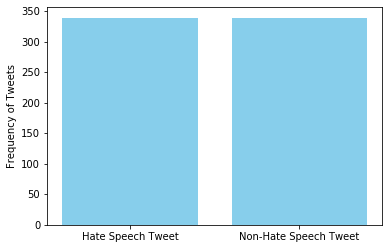

In [130]:
Sentiment_count = df_extra.groupby('label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['tweet'], color="skyblue")
plt.xticks([0,1], ["Hate Speech Tweet", "Non-Hate Speech Tweet"])
plt.ylabel('Frequency of Tweets')
plt.show()

#### There are 339 hate and 339 non-hate speech entries in this dataset. 
#### Let's change the boolean True/False label assignments to 1 and 0 respectively. 

In [131]:
df_extra["label"] = df_extra["label"].astype(int)

In [132]:
df_extra.head(1)

,id,label,tweet
0,31963,1,rt @_makada_ muslim refugee charged with beati...


#### Now we have the same 3 columns as in the other dataset - including id, label, and tweet.

## Merging two datasets:

In [133]:
data = df.append(df_extra, ignore_index=True, verify_integrity=False, sort=False)

In [134]:
data.label.value_counts()

0    30059
1     2581
Name: label, dtype: int64

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32640 entries, 0 to 32639
Data columns (total 3 columns):
id       32640 non-null int64
label    32640 non-null int64
tweet    32640 non-null object
dtypes: int64(2), object(1)
memory usage: 765.1+ KB


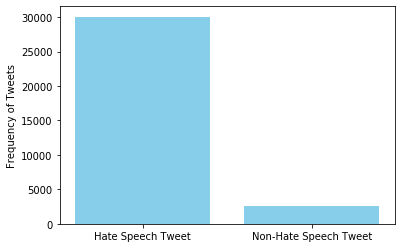

In [136]:
Sentiment_count = data.groupby('label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['tweet'], color="skyblue")
plt.xticks([0,1], ["Hate Speech Tweet", "Non-Hate Speech Tweet"])
plt.ylabel('Frequency of Tweets')
plt.show()

**Time to move on to the next step - exploratory data analysis!**

## Exploratory Data Analysis

### Below we visualize and look into the 
- distributions of lengths of all tweets in total, hate-speech and non-hate speech tweets separately;
- word frequencies using wordclouds.

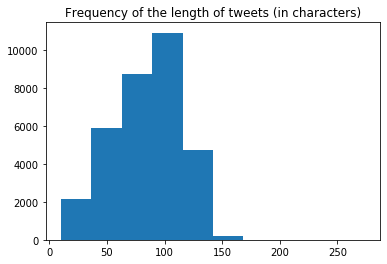

In [137]:
length_tweets = []
for i in range(len(data)):
    length_tweets.append(len(data.tweet[i]))

plt.hist(length_tweets)
plt.title("Frequency of the length of tweets (in characters)")
plt.show()

#### We cal split the dataset into non-hate speech and hate speech to look closer into each of them.

In [138]:
data_hate = data.loc[data.label==1]
data_no_hate = data.loc[data.label==0]

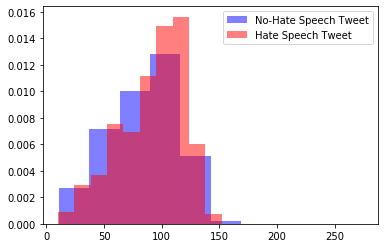

The mean of the length of hate speech tweets is: 91.62 characters
The median of the length of hate speech tweets is: 98.0 characters
---------------------------------------------------
The mean of the length of non-hate speech tweets is: 84.62 characters
The median of the length of non-hate speech tweets is: 88.0 characters


In [139]:
length_tweets_nh = []
length_tweets_h = []

for i in range(len(data_no_hate)):
    length_tweets_nh.append(len(data_no_hate.tweet.iloc[i]))

for i in range(len(data_hate)):
    length_tweets_h.append(len(data_hate.tweet.iloc[i]))

plt.hist(length_tweets_nh, density=True, alpha=0.5, color="blue") + plt.hist(length_tweets_h, density=True, alpha=0.5, color="red")
plt.legend(["No-Hate Speech Tweet", "Hate Speech Tweet"])
plt.show()

print("The mean of the length of hate speech tweets is:", round(np.mean(length_tweets_h), 2), "characters")
print("The median of the length of hate speech tweets is:", round(np.median(length_tweets_h), 2), "characters")
print("---------------------------------------------------")
print("The mean of the length of non-hate speech tweets is:", round(np.mean(length_tweets_nh), 2), "characters")
print("The median of the length of non-hate speech tweets is:", round(np.median(length_tweets_nh), 2), "characters")

#### We can note that the histograms of two groups are similarly distributed, however additional test (e.g. hypothesis testing) is needed to find if there are any statistically significant differences between the two groups.

### Tokenization

**The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words, and it breaks the raw text into word called tokens.**

#### Let's tokenize all of the words in the tweek column, utilizing NLTK package in Python, and let's also lowercase all of the words (since "A" and "a" are treated differently in ASCII code, however this is distinction is not relevant in our context).

In [140]:
import nltk
from nltk.tokenize import word_tokenize

data['tweet_token'] = data['tweet'].apply(lambda x: word_tokenize(x.lower()))

#### This is what the column of the tweets looks like after tokenization:

In [141]:
data.loc[data.label==1, 'tweet_token']

13       [@, user, #, cnn, calls, #, michigan, middle, ...
14       [no, comment, !, in, #, australia, #, opkillin...
17                            [retweet, if, you, agree, !]
23       [@, user, @, user, lumpy, says, i, am, a, ., p...
34       [it, 's, unbelievable, that, in, the, 21st, ce...
                               ...                        
32296    [yeah, yeah, yeah, ., ., poor, you, ., ., ., y...
32297    [@, foxnews, @, love_the_donald, how, about, f...
32298                 [bitch, you, look, like, a, refugee]
32299    [this, is, not, the, idea, for, refugees, who,...
32300    [#, sanctuarycities, ethiopian, \'refugee\, ',...
Name: tweet_token, Length: 2581, dtype: object

### Stopwords removal

#### We see that some entries are invalid (with some fun-looking special signs present). Let's remove all of these stopwords using NLTK stopwords application.

In [142]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [143]:
data['token_clean'] = data['tweet_token'].apply(lambda x: [w for w in x if w not in stop_words])
data.head()

,id,label,tweet,tweet_token,token_clean
0,1,0,@user when a father is dysfunctional and is s...,"[@, user, when, a, father, is, dysfunctional, ...","[@, user, father, dysfunctional, selfish, drag..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[@, user, @, user, thanks, for, #, lyft, credi...","[@, user, @, user, thanks, #, lyft, credit, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the...","[#, model, love, u, take, u, time, urð±, !, ..."
4,5,0,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]","[factsguide, :, society, #, motivation]"


#### Let's remove punctuation, by implementing a function that will store the entry it it is not in list of punctuation.

In [144]:
import string

# creating a list of punctuation characters

list_punctuation = []
for ch in string.punctuation:
    list_punctuation.append(ch)

In [145]:
data['token_cleaner'] = data['token_clean'].apply(lambda x: [w for w in x if w not in list_punctuation])
data['token_cleaner']

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, ca, n't, us...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
32635    [eus, treatment, lone, children, one, shameful...
32636    [rt, chakerkhazaal, einstein, refugee, world, ...
32637    [rt, ticley, god, help, poor, refugees, frump,...
32638    [success, refugee, neurobiologist, arrived, sw...
32639    [rt, hasasimo, syria, refugee, helps, fulfill,...
Name: token_cleaner, Length: 32640, dtype: object

#### A bit more cleaning required. Let's remove the special characters outside punctuation list that we didn't expect to see!


In [146]:
import string
data['token_clean_alph'] = data['token_cleaner'].apply(lambda x: [i for i in x if i.isalpha()])
data['token_clean_alph']

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, ca, use, ca...
2                                        [bihday, majesty]
3                          [model, love, u, take, u, time]
4                        [factsguide, society, motivation]
                               ...                        
32635    [eus, treatment, lone, children, one, shameful...
32636    [rt, chakerkhazaal, einstein, refugee, world, ...
32637    [rt, ticley, god, help, poor, refugees, frump,...
32638    [success, refugee, neurobiologist, arrived, sw...
32639    [rt, hasasimo, syria, refugee, helps, fulfill,...
Name: token_clean_alph, Length: 32640, dtype: object

**Now our tweets data only contains strings with words, and no special characters or punctuation!**

# Preparation of testing data for later use

In [147]:
## Test Dataset
data_test = pd.read_csv('test.csv')

In [148]:
data_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


**We replicate the same tokenization and text preparation techniques as above with training data.**

In [149]:
data_test['tweet_token'] = data_test['tweet'].apply(lambda x: word_tokenize(x.lower()))

In [150]:
data_test['token_clean'] = data_test['tweet_token'].apply(lambda x: [w for w in x if w not in stop_words])

In [151]:
data_test['token_cleaner'] = data_test['token_clean'].apply(lambda x: [w for w in x if w not in list_punctuation])

In [152]:
data_test['token_clean_alph'] = data_test['token_cleaner'].apply(lambda x: [i for i in x if i.isalpha()])

In [153]:
data_test.token_clean_alph.head()

0    [studiolife, aislife, requires, passion, dedic...
1    [user, white, supremacists, want, everyone, se...
2    [safe, ways, heal, acne, altwaystoheal, health...
3    [hp, cursed, child, book, reservations, alread...
4    [bihday, amazing, hilarious, nephew, eli, ahmi...
Name: token_clean_alph, dtype: object

## Word frequencies 
#### Let's look into word frequencies of the general dataset and its 2 variations with hate and non-hate speech. Thus we create frequency lists of of the entire dataset and it split into hate and non-hate speech parts, mapping each word to the amount of times the word is used across the tweets.

In [168]:
## Entire dictionary
frequency_dict = dict()

for each_tweet in range(len(data['token_clean_alph'])):
    for word in data['token_clean_alph'][each_tweet]:
        if word in frequency_dict: 
            frequency_dict[word] += 1
        else: 
            frequency_dict[word] = 1        

In [169]:
## non-hate dictionary
frequency_dict_nonhate = dict()

for each_tweet in range(len(data.loc[data['label']==0,'token_clean_alph'])):
    for word in data['token_clean_alph'][each_tweet]:
        if word in frequency_dict_nonhate: 
            frequency_dict_nonhate[word] += 1
        else: 
            frequency_dict_nonhate[word] = 1  

In [170]:
## hate speech dictionary
frequency_dict_hate = dict()

for each_tweet in range(len(data.loc[data['label']==1,'token_clean_alph'])):
    for word in data['token_clean_alph'][each_tweet]:
        if word in frequency_dict_hate: 
            frequency_dict_hate[word] += 1
        else: 
            frequency_dict_hate[word] = 1        

### Let's create some wordclouds to see which words are most frequent in the dataset.

In [171]:
from wordcloud import WordCloud

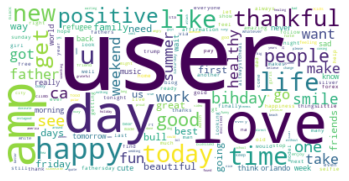

In [172]:
## for all dataset
wordcloud = WordCloud(min_word_length = 2, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

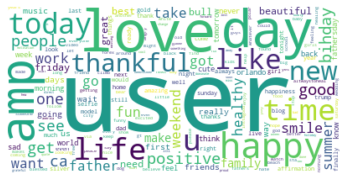

In [173]:
## for non-hate speech tweets
wordcloud = WordCloud(min_word_length = 2, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict_nonhate)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

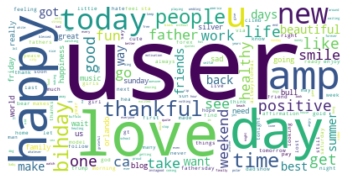

In [174]:
## for hate speech tweets
wordcloud = WordCloud(min_word_length = 2, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict_hate)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Based on the observations of wordclous and histrograms above we want to delete the entries with - "user", "like", "via", and combine entries like rt and reetweet.

In [175]:
keys_to_be_deleted = ['user', 'like', 'via']

for i in keys_to_be_deleted:
    if i in frequency_dict:
        del frequency_dict[i]
    else:
        print(f'Key {i} is not in the dictionary')

### Stemming

We use apply stemming, the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. We user PorterStemmer application from NLTK.

In [177]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
data['words_stemmed'] = data['token_clean_alph'].apply(lambda x: [ps.stem(i) for i in x])

We assign the value of y to the entries in a column of labels, as it will be needed for further machine learning model definition.

In [178]:
y = data['label']

### Vectorization

In order to use this textual data in machine learning analysis, we need to vectorize it (present it in a form of a numerical vector). We use the application of TfidfVectorizer from sklearn library in Python.

For the purposes of our analysis, we input the parameter values for the tfidf - max_df (ignore terms that have a document frequency strictly higher than the given threshold) as 0.9, min_df (ignore terms that have a document frequency strictly lower than the given threshold) as 23, and max_features (the top maximum features) as 3000. 

We also specify token_pattern to get rid of special characters that prior data cleaning did not account for!

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer

def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun, max_df = 0.9, min_df = 23, max_features = 3000, token_pattern = '[a-z]+\w*')  

In [184]:
docs = data['words_stemmed']
tfidf.fit(docs)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=3000,
                min_df=23, ngram_range=(1, 1), norm='l2',
                preprocessor=<function dummy_fun at 0x7fb6bae83290>,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='[a-z]+\\w*',
                tokenizer=<function dummy_fun at 0x7fb6bae83290>, use_idf=True,
                vocabulary=None)

In [185]:
tfidf.transform(docs)

<32640x1554 sparse matrix of type '<class 'numpy.float64'>'
	with 173904 stored elements in Compressed Sparse Row format>

In [186]:
# Uncomment the cell below to view the Tfidf vocabulary.
# tfidf.vocabulary_

Let's create a dataframe for the entries of Tfidf vocabulary.

In [187]:
df = pd.DataFrame(data = tfidf.fit_transform(docs).toarray(), columns=tfidf.get_feature_names())

In [188]:
df.shape

(32640, 1554)

**Displaying the vectorized dataset below:**

In [190]:
df.head(10)

,aap,abl,absolut,abt,abus,accept,account,achiev,across,act,...,yet,yo,yoga,york,young,youth,youtub,yr,yum,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**We add a column with hate speech labels.**

In [191]:
df["hate_speech"] = y

In [192]:
df.head()

,aap,abl,absolut,abt,abus,accept,account,achiev,across,act,...,yo,yoga,york,young,youth,youtub,yr,yum,yummi,hate_speech
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Training models (Logistic Regression, Decision Tree, Random Forest, Multinomial Naive Bayes, anb SVM).

### Using Hyperparameter tuning and Cross-Validation

In [202]:
from sklearn.model_selection import GridSearchCV

For each of the machine learning models we have to input slightly different parameters, however, instead of applying our own values that can be subjective we can utilize hyperparameter tuning and cross validation that will find the optimal values for hyperparameters, using GridSearchCV.

### Using ROC Curve Metric

In [217]:
import numpy as np 
from sklearn import metrics

The ROC curve (Receiver Operating Characteristics Curve) is a metric used to measure the performance of a classifier model. It depicts the rate of true positives with respect to the rate of false positives, highlighting the sensitivity of the classifier model. We will be using this metric to evaluate each of the models we create.

### Training a Logistic Regression model 

In [203]:
from sklearn.linear_model import LogisticRegression

**[TO BE DEBUGGED] Hyperparameter tuning, Cross-Validation:**

In [204]:
# parameters = {'penalty':('l1', 'l2'), 'C':np.logspace(-2, 2, 5), 'solver':['liblinear']}

In [205]:
# clf = GridSearchCV(lr, param_grid = parameters, cv = 5, verbose=True)

In [216]:
#best_clf = clf.fit(X_train, y_train)

____

In [206]:
lr = LogisticRegression(penalty = 'l1', C=0.5, solver='liblinear', random_state = 0)

In [207]:
## splitting into x and y variables for the Logistic Regression
X_train = df.iloc[:,:-1] 
y_train = df['hate_speech']

In [208]:
lr.fit(X = df.iloc[:,:-1], y = df['hate_speech'])

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
lr.predict(X = df.iloc[:,:-1]).mean()

0.03771446078431372

**What do the coefficients of logistic regression tell us?**

Let's explore the coefficients of the logistic regression model to then look which text entries (words) correlate with being classified as hate and non-hate tweets.

In [211]:
print('N of positive coefficients:', sum(lr.coef_[0] > 0))
print('N of negative coefficients:', sum(lr.coef_[0] < 0))

N of positive coefficients: 192
N of negative coefficients: 121


Let's create a dataframe to explore the columns of entries with the coefficients assigned to them.

In [212]:
## convert to a pandas dataframe, sort with higher coefficients
X_train.columns 
d = {'coef': lr.coef_[0], 'columns': X_train.columns}
dataframe = pd.DataFrame(data=d)

In [213]:
dataframe.sort_values(by='coef', ascending=True).head(20)

,coef,columns
345,-6.693426,day
969,-5.055006,orlando
139,-4.498363,bihday
791,-4.190140,life
640,-3.905888,healthi
821,-3.880941,love
1250,-3.783897,smile
625,-3.753990,happi
1385,-2.974089,today
1389,-2.901158,tomorrow


In [215]:
dataframe.sort_values(by='coef', ascending=True).tail(20)

,coef,columns
147,4.112803,black
1242,4.174874,sjw
834,4.446039,maga
1117,4.540879,refuge
1414,4.547967,trump
947,4.560051,obama
1295,4.760944,stomp
789,4.862465,libtard
883,5.131054,misogynist
841,5.312162,malevot


**Inference from the coefficients:**

We can see that the highest value negative coefficients are represented by entries such as day orlando, bihday, life, healthi, love, smile, happi, today, tomorrow, weekend, week, cute, silver, friday, bull, beauti, bear, excit, summer.

The highest negative coefficients are represented by entries such as black, sjw, maga, refuge, trump, obama, stomp, libtard, misogynist, malevot, jew, blm, paladino, white, racist, bigot, boycott, racism, sikh, allahsoil.

While the highest negative values indicate being likely representative of the non-hate speech tweets, the positive ones indicate being likely representative of the hate speech tweets. We can see that such entries appear the most in the related types of tweets (negative coefficients in non-hate, and positive coefficients in hate speech tweets).

**ROC curve metric:**

In [60]:
import numpy as np 
from sklearn import metrics

In [61]:
# Figure out what are "scores" and "y"

In [62]:
#y = np.array([1, 1, 2, 2])
# scores = np.array([0.1, 0.4, 0.35, 0.8])
#fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
#fpr

### Training a Decision Tree model

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
# fitting
X_train = df.iloc[:,:-1] 
y_train = df['hate_speech']

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [65]:
# predicting
clf.predict(X = df.iloc[:,:-1]).mean()

0.00030637254901960784

### Training a Random Forest model

In [66]:
from sklearn.ensemble import RandomForestClassifier

ModuleNotFoundError: No module named 'sklear'

In [ ]:
# how to choose optimal depth and random state?

In [ ]:
# fitting 
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

In [ ]:
clf.predict(X = df.iloc[:,:-1]).mean()

### Training a Multinomial Naive Bayes model

**Note**: We use the Multinomial type of Naive Bayes model as it is widely used with textual data analysis and TFIDF.

In [ ]:
# fitting
clf = MultinomialNB()
clf.fit(X,y)

In [ ]:
# predicting
clf.predict(X = df.iloc[:,:-1]).mean()

### Training a SVM model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StanndardScaler
ffrom sklearn.svm import SVC

In [ ]:
#fitting

X_train = df.iloc[:,:-1] 
y_train = df['hate_speech']

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

In [ ]:
# predicting
clf.predict(X = df.iloc[:,:-1]).mean()

____